In [5]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import sys
import paleoclim_leeds.hadcm3_processing as hcm3
import paleoclim_leeds.util_hadcm3 as util

## Equilibrium run

In [25]:
ds = xr.open_dataset("/Documents/Documents/Cours/PHD/data/xosfa/xosfa.oceansalipg01.annual.nc")
sss = np.nanmean(ds.salinity_ym_dpth.values * 1000 + 35, axis=(1,2,3))
sss_m = tb.running_mean(sss,10)

ds = xr.open_dataset("/Documents/Documents/Cours/PHD/data/xosfa/xosfa.oceantemppg01.annual.nc")
sst = np.nanmean(ds.temp_ym_dpth.values, axis=(1,2,3))
sst_m = tb.running_mean(sst,10)

time = np.arange(len(sss))

Text(0.5, 0, 'Simulation Years')

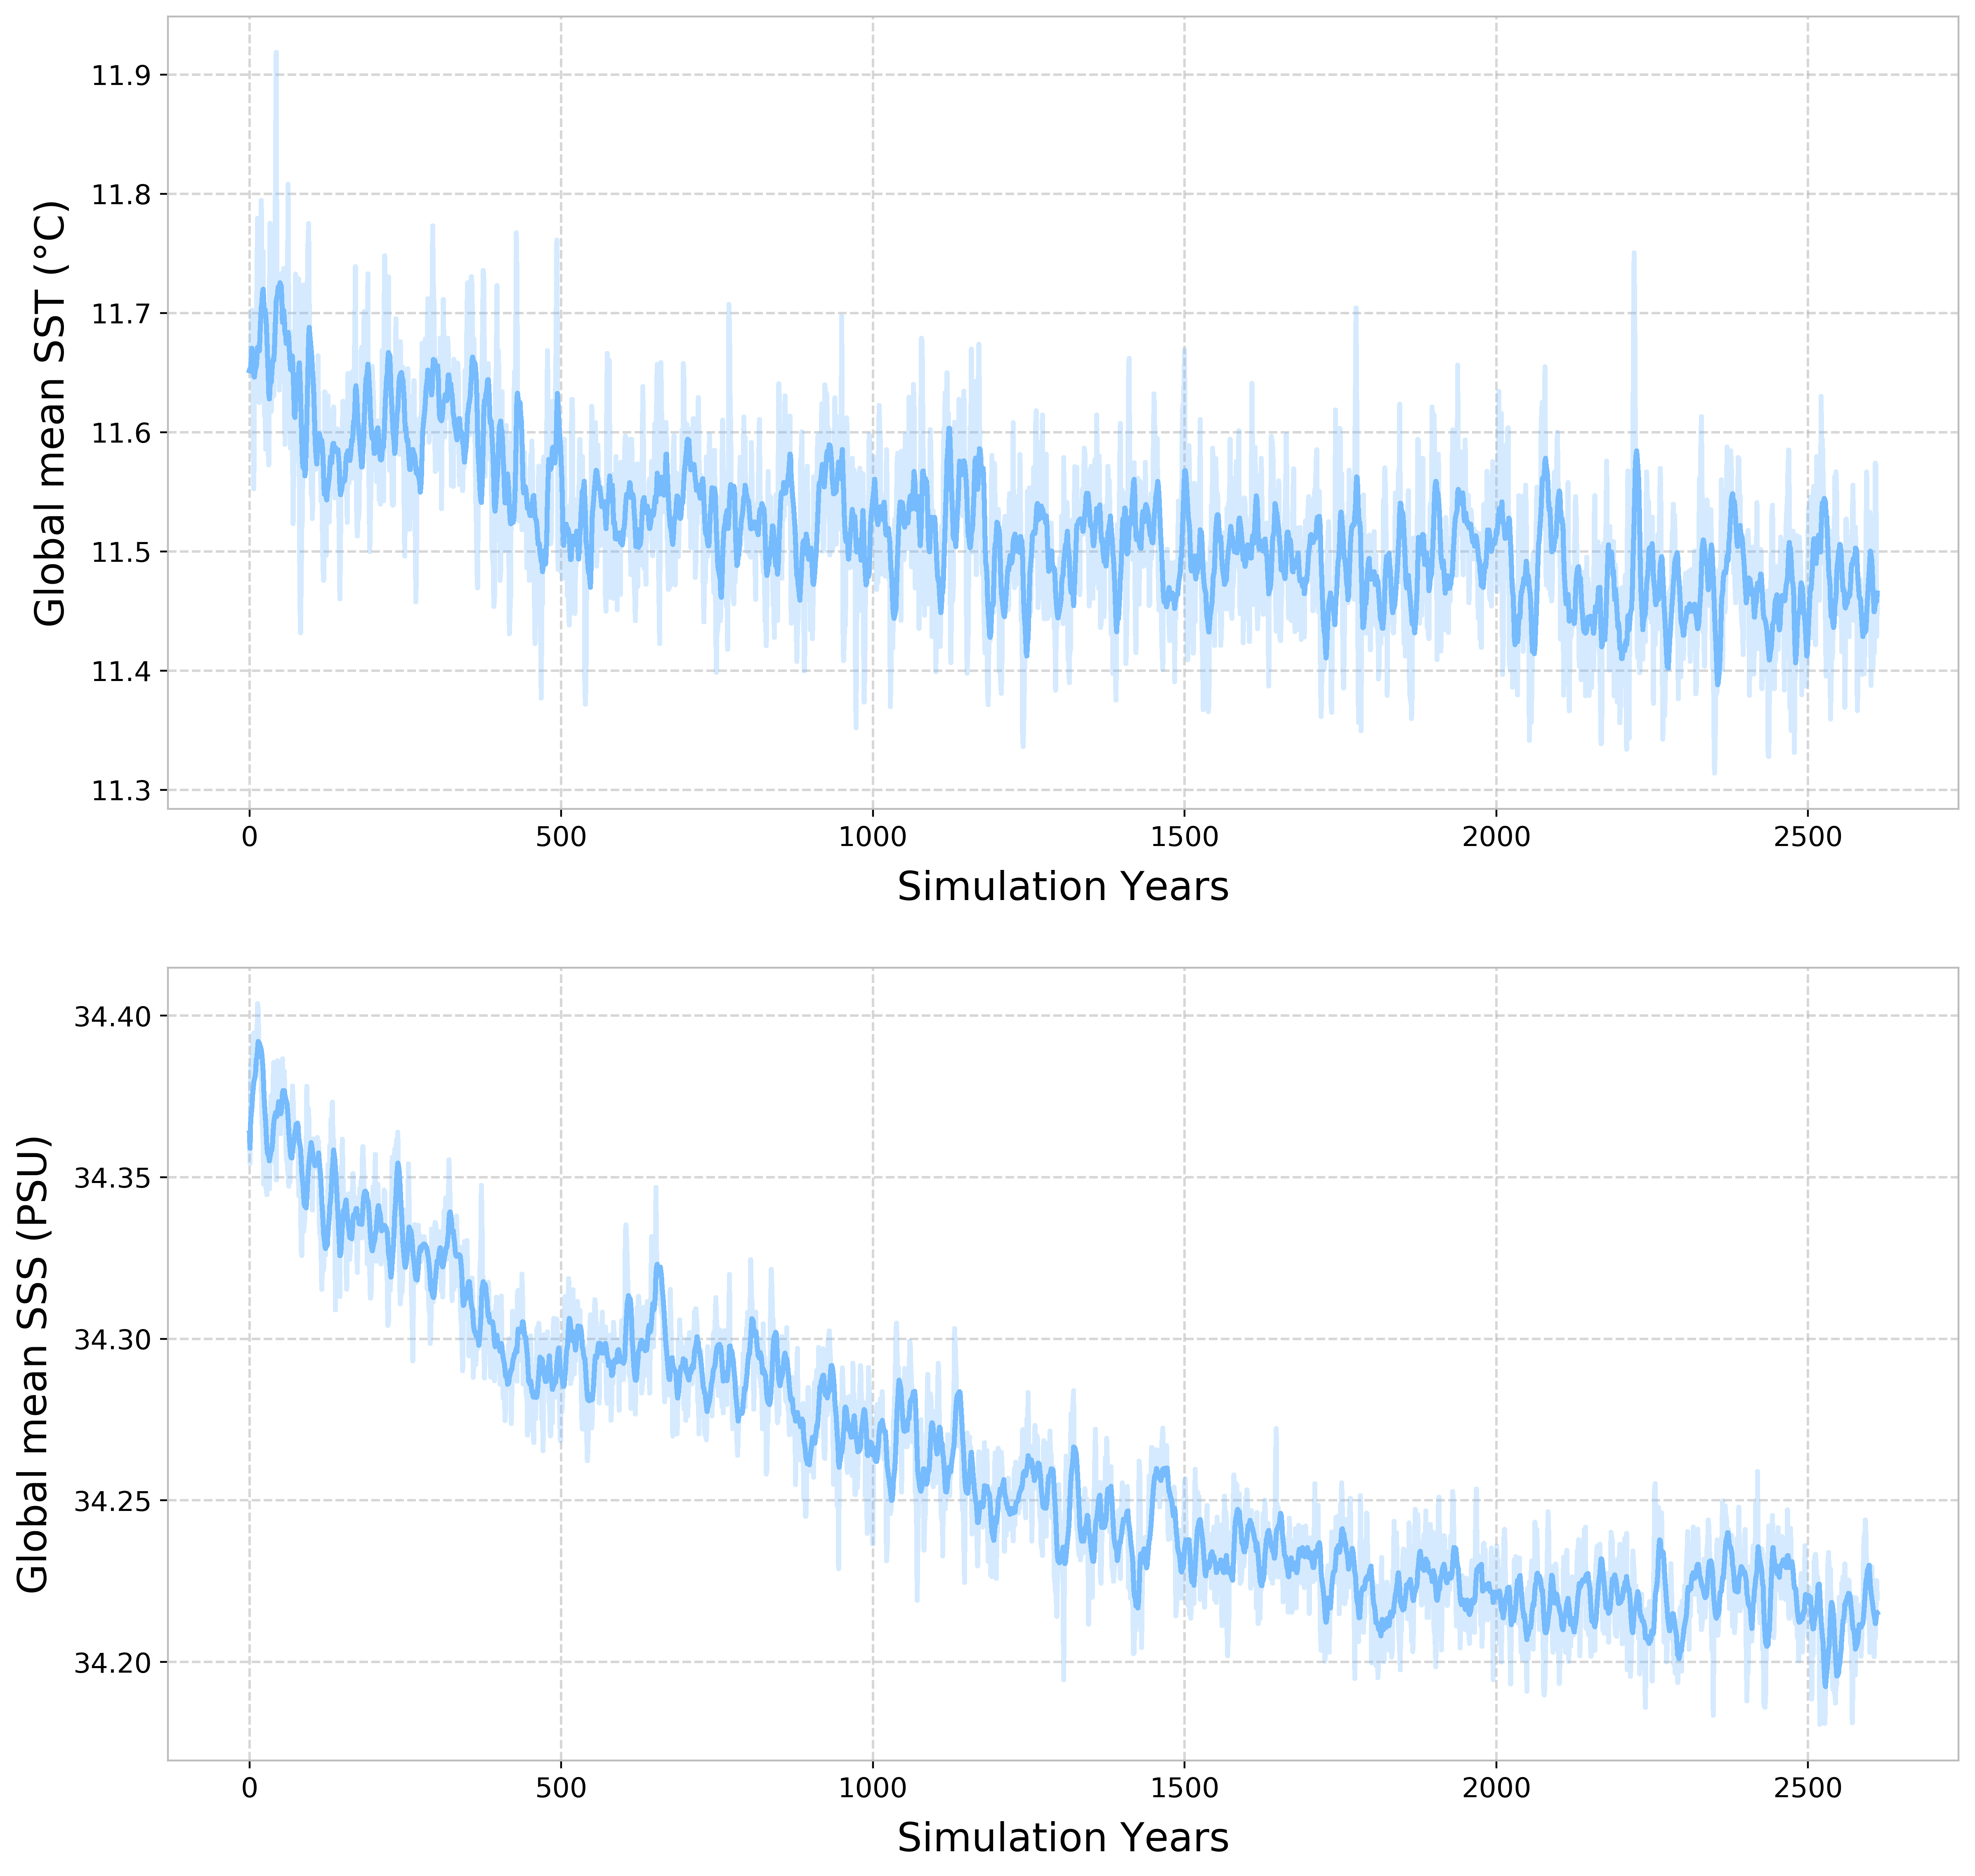

In [33]:
figMap, (axSST, axSSS) = plt.subplots(nrows=2, ncols=1, figsize=(14, 14), dpi=400)

axSST.plot(time, sst_m, color="xkcd:sky blue", linestyle="-")
axSST.plot(time, sst, color="xkcd:sky blue", linestyle="-", alpha = 0.3)
axSST.set_ylabel("Global mean SST (°C)")
axSST.ticklabel_format(style="sci")
axSST.set_xlabel("Simulation Years")

axSSS.plot(time, sss_m, color="xkcd:sky blue", linestyle="-")
axSSS.plot(time, sss, color="xkcd:sky blue", linestyle="-", alpha = 0.3)
axSSS.set_ylabel("Global mean SSS (PSU)")
axSSS.ticklabel_format(style="sci")
axSSS.set_xlabel("Simulation Years")

## Experiments

In [2]:
start_year = 2553
end_year = 3000

ts = hcm3.OCNTATS("xosfa", start_year, end_year)
temperature = ts.temperature(mode_lat="mean", mode_lon="mean", mode_z="mean")
temperature_values = temperature.values(processing=False)
t_temperature = np.linspace(ts.start_year, ts.end_year, len(temperature.t))

ts = hcm3.SALATS("xosfa", start_year, end_year)
salinity = ts.salinity(mode_lat="mean", mode_lon="mean", mode_z="mean")
salinity_values = salinity.values(processing=False)*1000 + 35
t_salinity = np.linspace(ts.start_year, ts.end_year, len(salinity.t))

ts = hcm3.MERIDATS("xosfa", start_year, end_year)
amoc = ts.atlantic(mode_lat="value", value_lat=26.5, mode_z="mean")
amoc_values = amoc.values(processing=False)
t_amoc = np.linspace(ts.start_year, ts.end_year, len(amoc.t))

__ Importation of <class 'paleoclim_leeds.hadcm3_processing.OCNTATS'> : xosfa between years 2553 and 3000.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS instance.
__ Importing sea water temperature (annual).
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


__ Importation of <class 'paleoclim_leeds.hadcm3_processing.SALATS'> : xosfa between years 2553 and 3000.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS instance.
__ Importing sea water salinity (annual).
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
__ Importation of <class 'paleoclim_leeds.hadcm3_processing.MERIDATS'> : xosfa between years 2553 and 3000.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS instance.
__ Importing meridional Overturning Stream Function (Atlantic).
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ New latitude value : 26.25


Text(0.5, 0, 'Simulation Years')

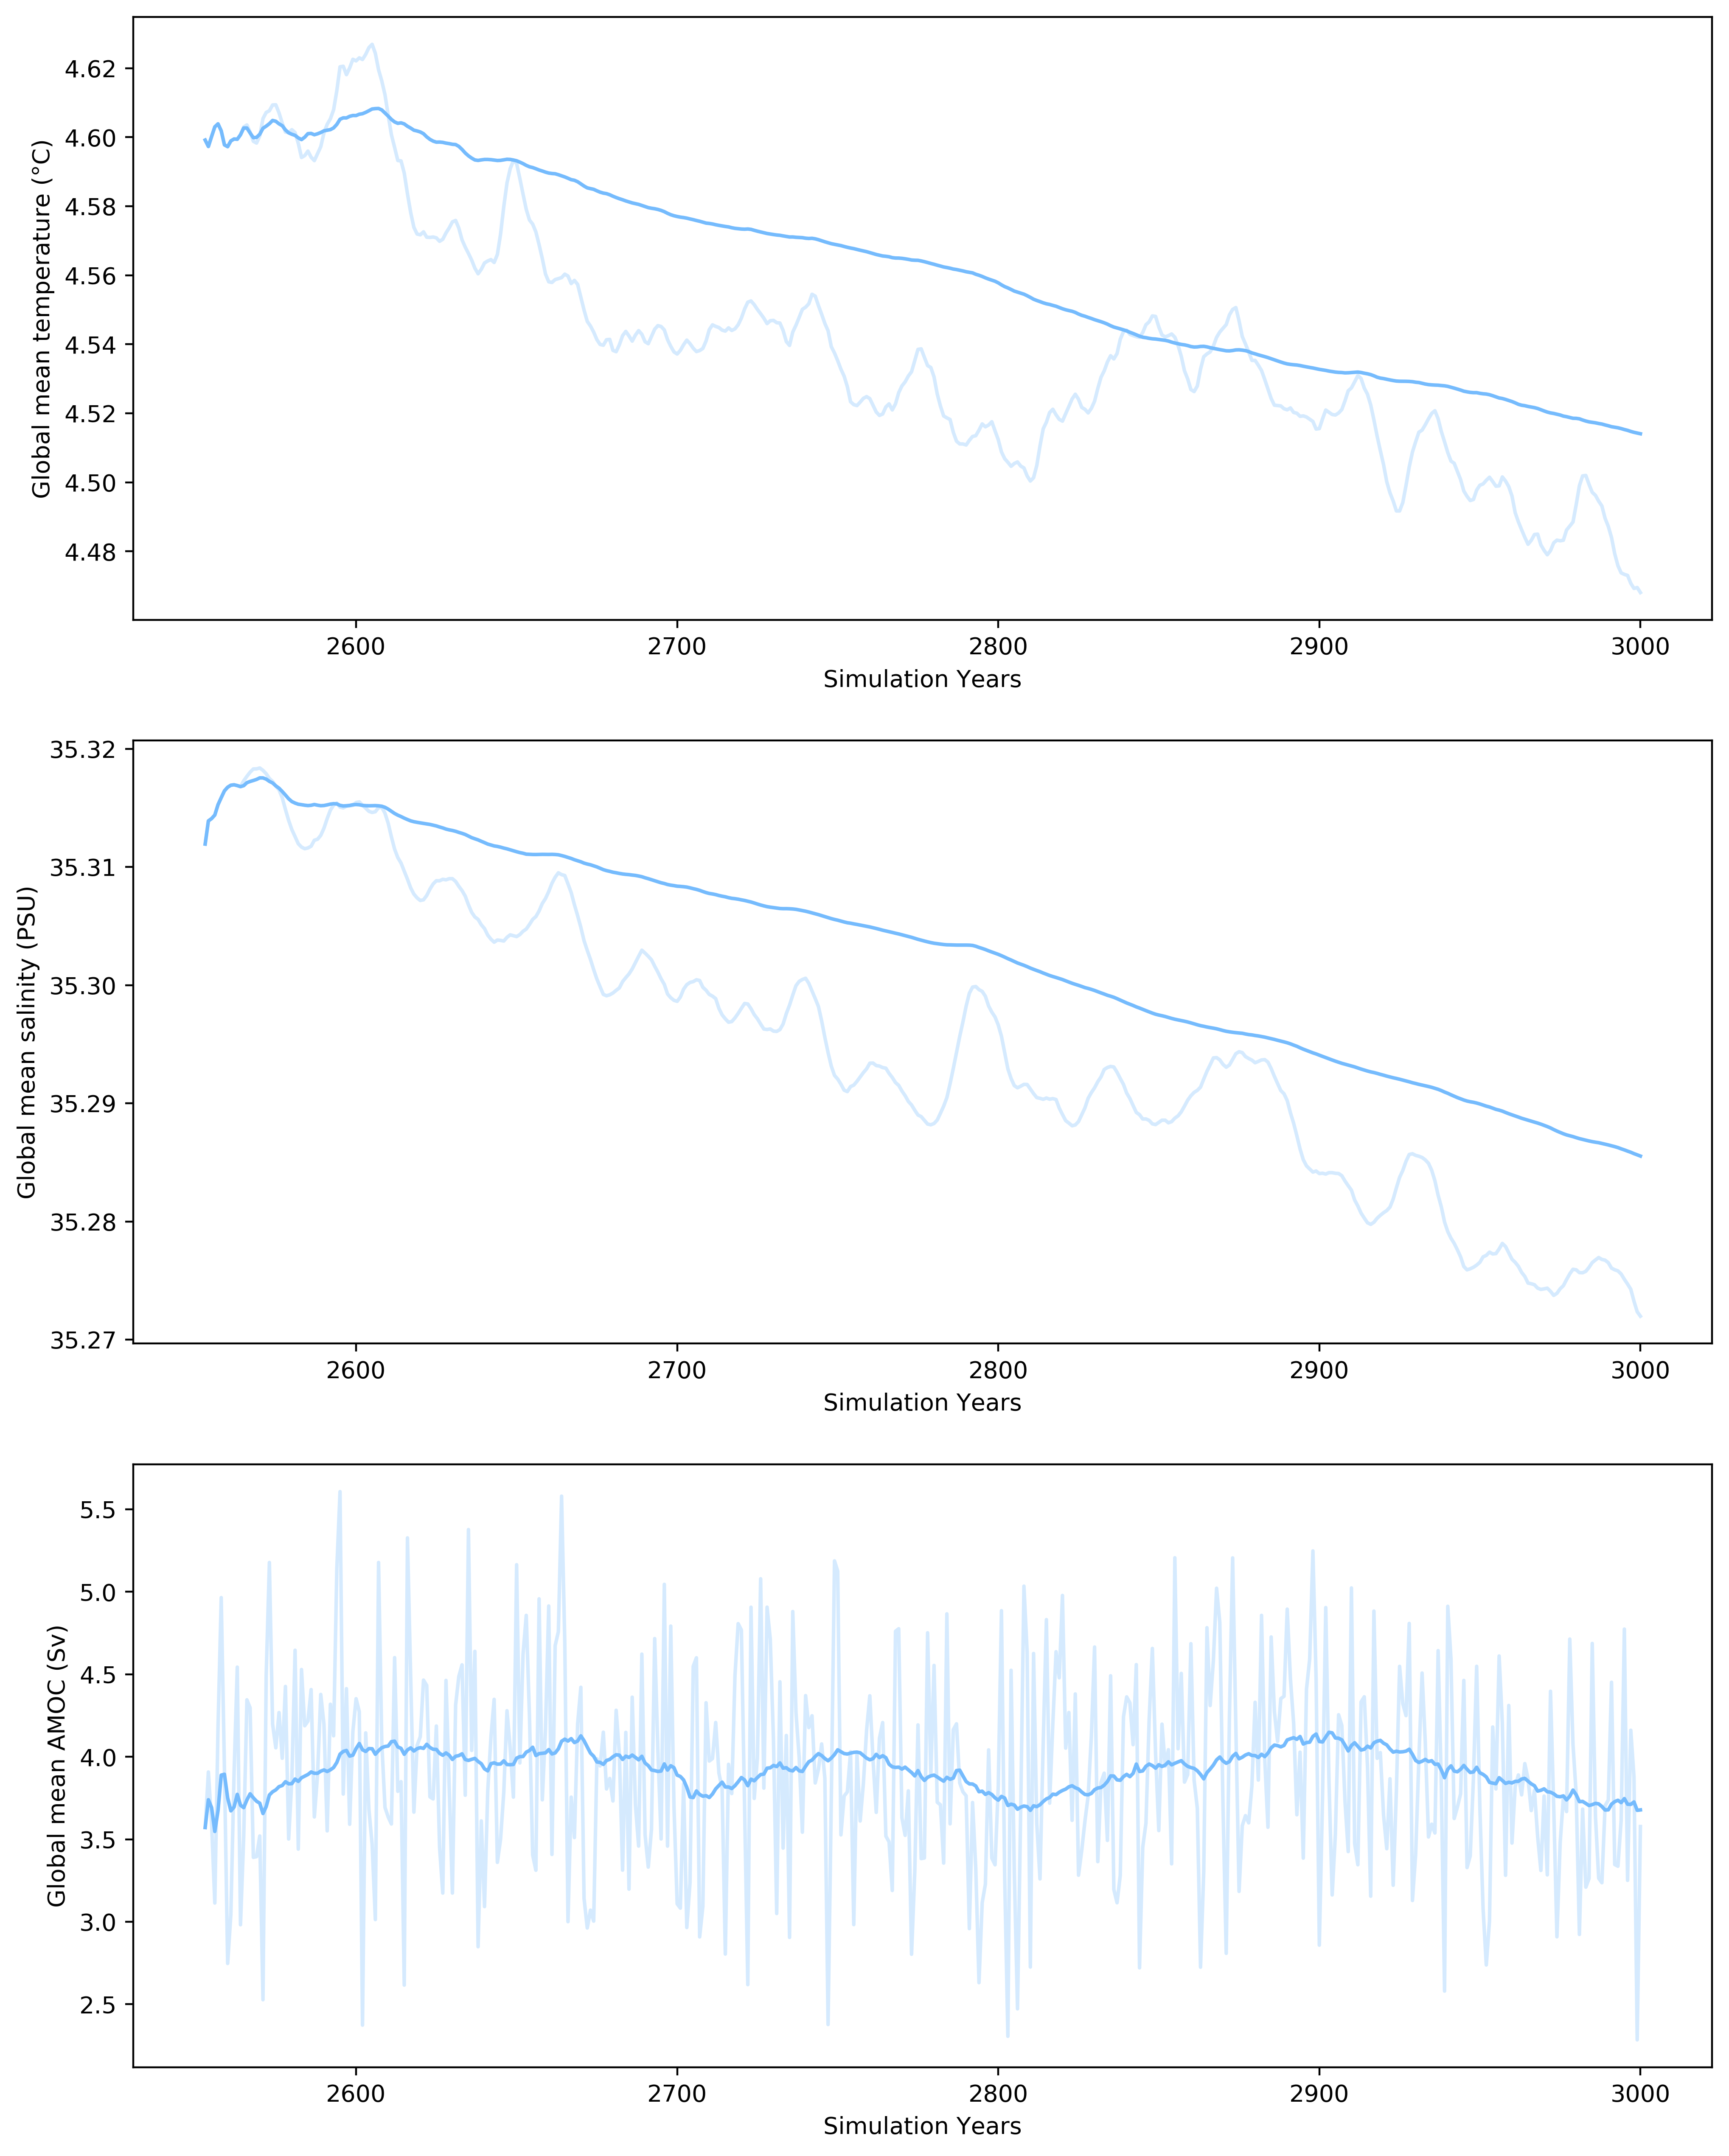

In [11]:
figMap, (axTemp, axSal, axAMOC) = plt.subplots(nrows=3, ncols=1, figsize=(12, 16), dpi=400)

axTemp.plot(t_temperature, util.running_mean(temperature_values, 240), color="xkcd:sky blue", linestyle="-")
axTemp.plot(t_temperature, util.running_mean(temperature_values, 12), color="xkcd:sky blue", linestyle="-", alpha=0.3)
axTemp.set_ylabel("Global mean temperature (°C)")
axTemp.ticklabel_format(style="sci")
axTemp.set_xlabel("Simulation Years")

axSal.plot(t_salinity, util.running_mean(salinity_values, 240), color="xkcd:sky blue", linestyle="-")
axSal.plot(t_salinity, util.running_mean(salinity_values, 12), color="xkcd:sky blue", linestyle="-", alpha=0.3)
axSal.set_ylabel("Global mean salinity (PSU)")
axSal.ticklabel_format(style="sci")
axSal.set_xlabel("Simulation Years")

axAMOC.plot(t_amoc, util.running_mean(amoc_values, 40), color="xkcd:sky blue", linestyle="-")
axAMOC.plot(t_amoc, amoc_values, color="xkcd:sky blue", linestyle="-", alpha=0.3)
axAMOC.set_ylabel("Global mean AMOC (Sv)")
axAMOC.ticklabel_format(style="sci")
axAMOC.set_xlabel("Simulation Years")